In [51]:
import json
import os
import sys
import numpy as np

src_dir = os.path.abspath(os.path.join(os.pardir, 'src'))
sys.path[0] = src_dir
from support import ROLES, CREDITS
from my_mongo_db_login import DB_LOGIN_INFO
import support as support

In [3]:
%load_ext autoreload
%autoreload 2

%matplotlib inline

In [4]:
with open('../data/raw_data/movies.json') as f:
    movie_file = f.read()
    movie_data = json.loads(movie_file)

In [5]:
role = 'producing'
role_key = role + "_gender_percentage"
all_movies = support.get_movies_df(role_key)
print('Got all_movies')


Loaded IMDb movies producing_gender_percentage
Got all_movies


In [6]:
all_movies.columns
#get 90s movies with only producer, id, title, year...
movie_90s = all_movies[(all_movies.year >= 1990) & (all_movies.year < 2000)]
movie_producer_df = movie_90s[['_id', 'producers', 'producing_gender_percentage', 'title', 'year']]

In [7]:
movie_producer_df = movie_producer_df.sort_values('year')

In [8]:
len(all_movies)

21475

### Community detecton using graph_tool

In [9]:
import graph_tool.all as gt

In [10]:
g = gt.Graph()

In [12]:
ug = gt.Graph(directed=False)

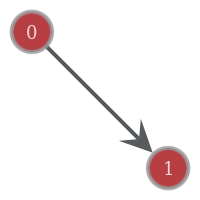

<PropertyMap object with key type 'Vertex' and value type 'vector<double>', for Graph 0x7fd18e68d860, at 0x7fd180afbd30>

In [13]:
v1 = g.add_vertex()
v2 = g.add_vertex()
e = g.add_edge(v1, v2)
gt.graph_draw(g, vertex_text=g.vertex_index, vertex_font_size=18, output_size=(200, 200), output='two-nodes.png')

In [33]:
vlist = g.add_vertex(10)
v = g.add_vertex()
print(g.vertex_index[v])

55


In [35]:
v = g.vertex(8)
g.add_edge(g.vertex(2), g.vertex(3))
e = g.edge(2,3)
e

<Edge object with source '2' and target '3' at 0x7fd17ae155d0>

In [37]:
g.add_edge(g.vertex(4), g.vertex(5))
e1 = g.edge(4,5)
e1

<Edge object with source '4' and target '5' at 0x7fd17ae15648>

In [38]:
g.get_out_degrees(g.get_vertices())

array([1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=uint64)

In [40]:
g.get_vertices()

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
       51, 52, 53, 54, 55], dtype=uint64)

In [46]:
edges = g.get_edges()
edges

array([[0, 1, 0],
       [2, 3, 1],
       [4, 5, 2]], dtype=uint64)

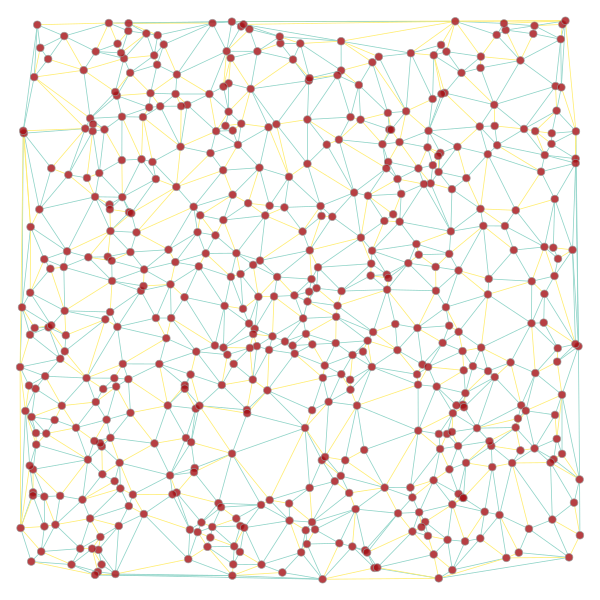

<PropertyMap object with key type 'Vertex' and value type 'vector<double>', for Graph 0x7fd180979240, at 0x7fd180979208>

In [67]:
g, pos = gt.triangulation(np.random.random((500, 2)) * 4, type="delaunay")
tree = gt.min_spanning_tree(g)
gt.graph_draw(g, pos=pos, edge_color=tree, output="min_tree.pdf")

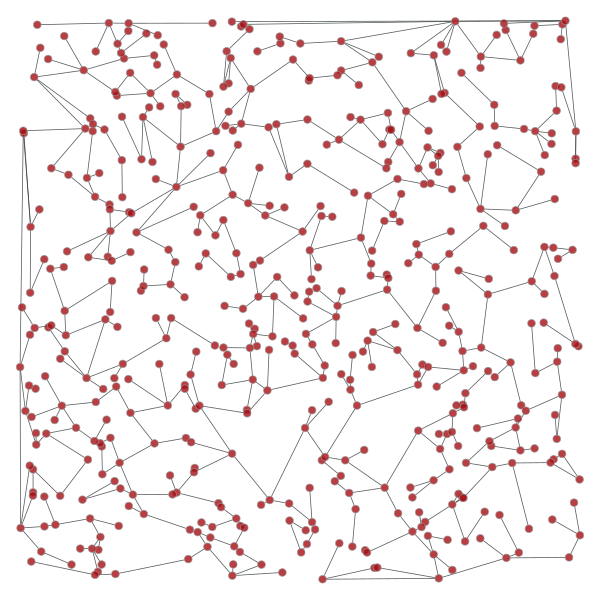

<PropertyMap object with key type 'Vertex' and value type 'vector<double>', for Graph 0x7fd180979240, at 0x7fd180979208>

In [68]:
g.set_edge_filter(tree)
gt.graph_draw(g, pos=pos, output="min_tree_filtered.pdf")

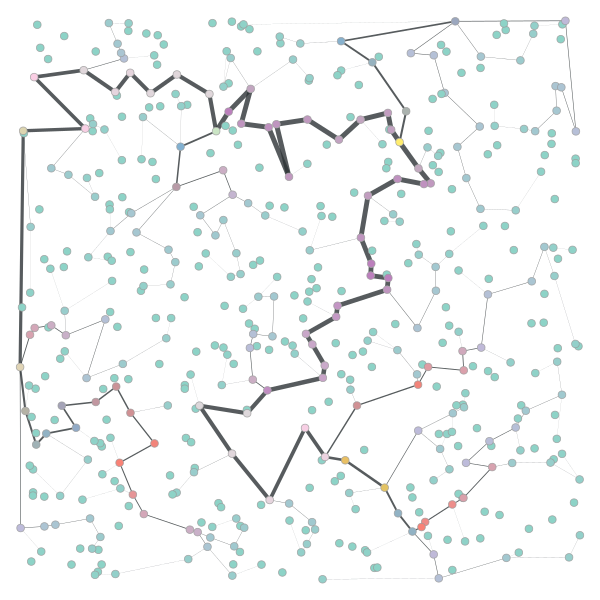

<PropertyMap object with key type 'Vertex' and value type 'vector<double>', for Graph 0x7fd180979240, at 0x7fd180979208>

In [69]:
bv, be = gt.betweenness(g)
be.a /= be.a.max() / 5
gt.graph_draw(g, pos=pos, vertex_fill_color=bv, edge_pen_width=be,
           output="filtered-bt.pdf")